In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50

from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

train_dir = 'drive/My Drive/Dataset-Paraguayos'
validation_dir = 'drive/My Drive/Dataset_test'
image_size = 224

vgg_conv = VGG16(weights='imagenet',include_top=False, input_shape=(image_size, image_size,3))
#vgg_conv = ResNet50(weights='imagenet',include_top=False, input_shape=(image_size, image_size,3))

for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
    
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
    
    
model = models.Sequential()

model.add(vgg_conv)

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='softmax'))

model.summary()

Using TensorFlow backend.
W0624 23:37:50.318548 139871847769984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 23:37:50.338038 139871847769984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 23:37:50.341001 139871847769984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 23:37:50.368340 139871847769984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0624 23:37:50.692817 1398718

<keras.engine.input_layer.InputLayer object at 0x7f3651e9d550> False
<keras.layers.convolutional.Conv2D object at 0x7f362aa1afd0> False
<keras.layers.convolutional.Conv2D object at 0x7f362aa1ae80> False
<keras.layers.pooling.MaxPooling2D object at 0x7f362aa37550> False
<keras.layers.convolutional.Conv2D object at 0x7f362aa376a0> False
<keras.layers.convolutional.Conv2D object at 0x7f362a1f07f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f362a20a6a0> False
<keras.layers.convolutional.Conv2D object at 0x7f362a20a7f0> False
<keras.layers.convolutional.Conv2D object at 0x7f362a1b4c88> False
<keras.layers.convolutional.Conv2D object at 0x7f362a1cbeb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f362a15da20> False
<keras.layers.convolutional.Conv2D object at 0x7f362a178080> False
<keras.layers.convolutional.Conv2D object at 0x7f362a110240> False
<keras.layers.convolutional.Conv2D object at 0x7f362a123a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f362a139ef0>

Found 167 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


W0624 23:37:52.118674 139871847769984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 23:37:52.217520 139871847769984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/17
4/3 [===================================] - 23s 6s/step - loss: 1.2534 - acc: 0.6555 - val_loss: 1.5249 - val_acc: 0.5667
Epoch 2/17
4/3 [===================================] - 2s 609ms/step - loss: 0.5397 - acc: 0.8032 - val_loss: 0.8955 - val_acc: 0.5667
Epoch 3/17
4/3 [===================================] - 2s 608ms/step - loss: 0.5058 - acc: 0.7944 - val_loss: 0.5887 - val_acc: 0.7667
Epoch 4/17
4/3 [===================================] - 2s 611ms/step - loss: 0.5504 - acc: 0.7779 - val_loss: 1.1892 - val_acc: 0.5667
Epoch 5/17
4/3 [===================================] - 2s 607ms/step - loss: 0.4494 - acc: 0.8084 - val_loss: 1.5580 - val_acc: 0.5667
Epoch 6/17
4/3 [===================================] - 3s 820ms/step - loss: 0.4270 - acc: 0.8113 - val_loss: 0.8951 - val_acc: 0.5667
Epoch 7/17
4/3 [===================================] - 5s 1s/step - loss: 0.5874 - acc: 0.7989 - val_loss: 0.7246 - val_acc: 0.5667
Epoch 8/17
4/3 [===================================] - 5s 1s

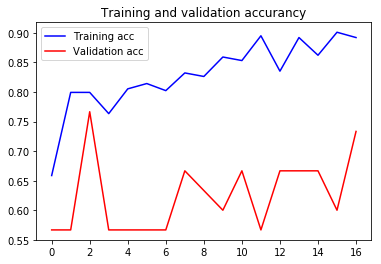

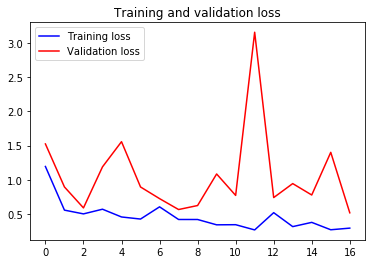

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_batchsize = 100
val_batchsize = 10

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size,image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size,image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=2*train_generator.samples/train_generator.batch_size,
        epochs=17,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples/validation_generator.batch_size,
        verbose=1)

model.save('last4_layers.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accurancy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Found 30 images belonging to 2 classes.
3/3 [==============================] - 0s 163ms/step
No of error = 8/30


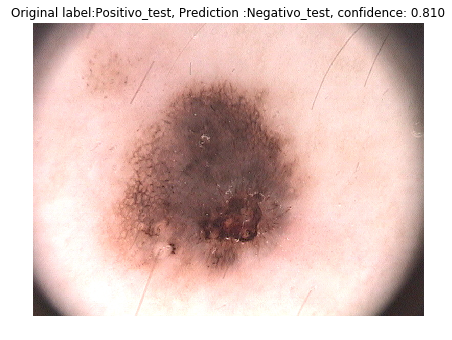

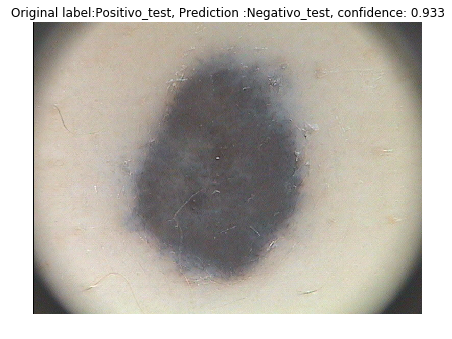

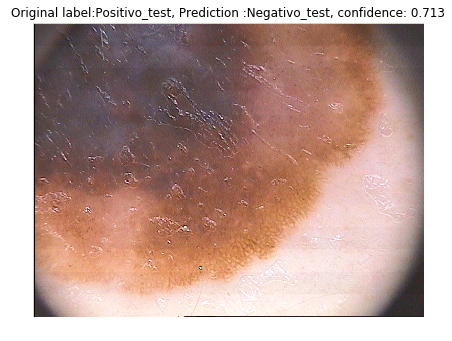

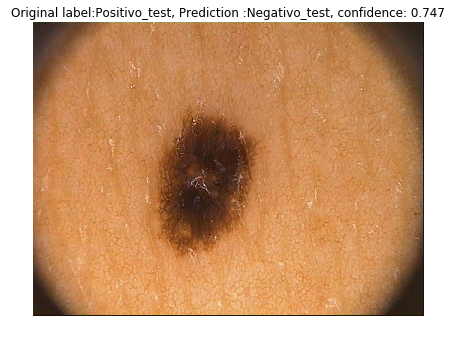

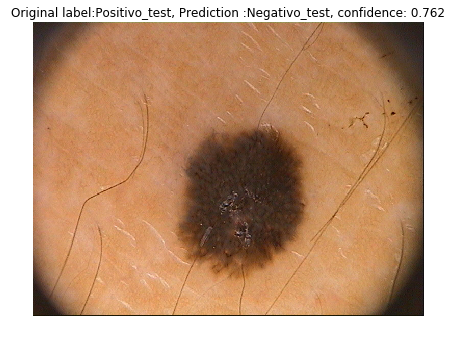

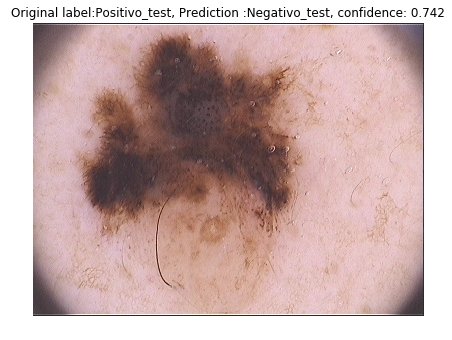

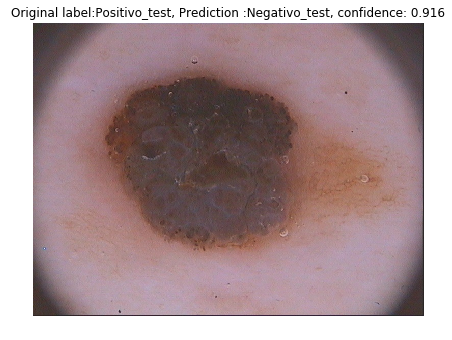

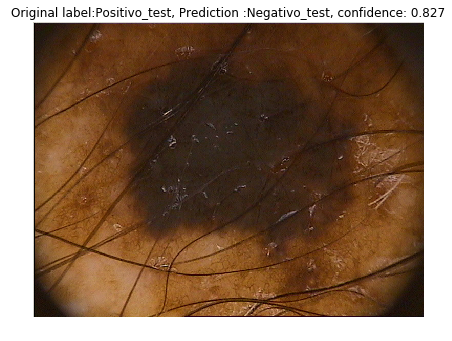

In [3]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size,image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

fnames = validation_generator.filenames

ground_truth = validation_generator.classes

label2index = validation_generator.class_indices

idx2label = dict((v,k) for k,v in label2index.items())

predictions = model.predict_generator(validation_generator,steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of error = {}/{}".format(len(errors),validation_generator.samples))

for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence: {:.3f}'.format(
            fnames[errors[i]].split('/')[0],
            pred_label,
            predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [4]:
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image

new_model =  load_model('./last4_layers.h5')
new_model.summary()

def predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    return preds


model_path = 'last4_layers.h5'
print('Loading model:', model_path)
#t0 = time.time()
model = load_model(model_path)
#t1 = time.time()
#print('Loaded in:', t1-t0)

test_path1 = 'drive/My Drive/Prueba_prediccion/IMD168.bmp'
print('Generating predictions on image:', test_path1)
preds = predict(test_path1, model)
print('Predicted clase 1:', preds[0][0])
print('Predicted clase 2:', preds[0][1])

test_path2 = 'drive/My Drive/Dataset_test/Negativo_test/IMD008.bmp'
print('Generating predictions on image:', test_path2)
preds = predict(test_path2, model)
print('Predicted clase 1:', preds)
print('Predicted clase 2:', preds[0][1])

#plt.imshow(test_path2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 32,772,610
Non-trainable params: 7,635,264
_________________________________________________________________
Loading model: last4_layers.h5
Generating predictions on image: drive/My Drive/Prueba_prediccion/IMD168.bmp
Predicted clas